In [1]:
import ccxt 
import pandas as pd
bitmex = ccxt.bitmex({
    'enableRateLimit': True,
    #'verbose': True,
})
depth = bitmex.fetchOrderBook('BTC/USD')
#depth = bitmex.fetchOrderBook('XRPM18')
depth

{'asks': [[7423.5, 730562],
  [7424, 229135],
  [7424.5, 130948],
  [7425, 60879],
  [7425.5, 246829],
  [7426, 52059],
  [7426.5, 20570],
  [7427, 45727],
  [7427.5, 17521],
  [7428, 42909],
  [7428.5, 24069],
  [7429, 49747],
  [7429.5, 39061],
  [7430, 390947],
  [7430.5, 304344],
  [7431, 57807],
  [7431.5, 35255],
  [7432, 29623],
  [7432.5, 17833],
  [7433, 39139],
  [7433.5, 419032],
  [7434, 32014],
  [7434.5, 85171],
  [7435, 429249],
  [7435.5, 71640]],
 'bids': [[7423, 111293],
  [7422.5, 125625],
  [7422, 84100],
  [7421.5, 133150],
  [7421, 502762],
  [7420.5, 45966],
  [7420, 170339],
  [7419.5, 25110],
  [7419, 42307],
  [7418.5, 19680],
  [7418, 182900],
  [7417.5, 46771],
  [7417, 28872],
  [7416.5, 63569],
  [7416, 355707],
  [7415.5, 266389],
  [7415, 628140],
  [7414.5, 15025],
  [7414, 471592],
  [7413.5, 86013],
  [7413, 173367],
  [7412.5, 338646],
  [7412, 155778],
  [7411.5, 29625],
  [7411, 134849]],
 'datetime': None,
 'nonce': None,
 'timestamp': None}

In [2]:
import numpy as np
df = pd.DataFrame()
middle = 0
for name in ['asks','bids']:
    target = np.array(depth[name])
    df[name] = target[:,0]
    df[name + " quantity" ] = target[:,1]
    middle = middle + df[name][0]

middle = middle/2

for name in ['asks','bids']:
    df[name] = abs(df[name] - middle)
df.head()


,asks,asks quantity,bids,bids quantity
0,0.25,730562.0,0.25,111293.0
1,0.75,229135.0,0.75,125625.0
2,1.25,130948.0,1.25,84100.0
3,1.75,60879.0,1.75,133150.0
4,2.25,246829.0,2.25,502762.0


In [3]:
df = df.rename(columns = {"asks":"price"})
df.set_index('price',inplace=True)
df = df.drop('bids', axis=1)
df

,asks quantity,bids quantity
price,,
0.25,730562.0,111293.0
0.75,229135.0,125625.0
1.25,130948.0,84100.0
1.75,60879.0,133150.0
2.25,246829.0,502762.0
2.75,52059.0,45966.0
3.25,20570.0,170339.0
3.75,45727.0,25110.0
4.25,17521.0,42307.0


In [4]:
copy = df.copy()
bid = 0
ask = 0
for index, row in df.iterrows():
    ask = ask + row["asks quantity"]
    bid = bid + row["bids quantity"]
    copy["asks quantity"][index] = ask
    copy["bids quantity"][index] = bid
copy

,asks quantity,bids quantity
price,,
0.25,730562.0,111293.0
0.75,959697.0,236918.0
1.25,1090645.0,321018.0
1.75,1151524.0,454168.0
2.25,1398353.0,956930.0
2.75,1450412.0,1002896.0
3.25,1470982.0,1173235.0
3.75,1516709.0,1198345.0
4.25,1534230.0,1240652.0


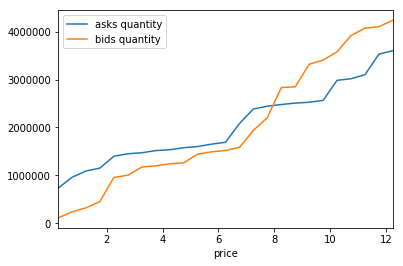

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
copy.plot()

[  7.46094809e+05   1.40811642e-01]


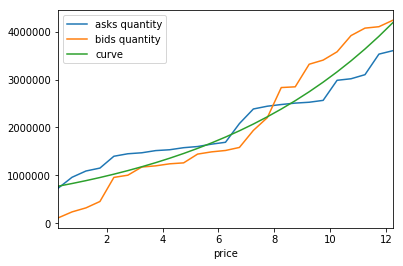

In [8]:
from scipy.optimize import curve_fit
def nonlinear_fit(x,A,k):
    return  A * np.exp(k*x)
indexes = copy.index.values
indexes = np.append(indexes,copy.index.values)

values = copy["bids quantity"].values
values = np.append(values, copy["asks quantity"].values)

param, cov = curve_fit(nonlinear_fit, indexes, values)

y = []
for num in copy.index.values :
    y.append(nonlinear_fit(num,param[0],param[1]))
print(param)
copy["curve"] = y
copy.plot()